In [1]:
words = open('names.txt', 'r').read().split('\n')
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [2]:
len(words)

32033

In [3]:
min(len(w) for w in words)

2

In [4]:
max(len(w) for w in words)

15

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [6]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [7]:
import torch

In [8]:
N = torch.zeros((27,27), dtype=torch.int32)

In [9]:
chars = list(set(''.join(words)))
chars.sort()
chars


['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [10]:
stoi = {ch:i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

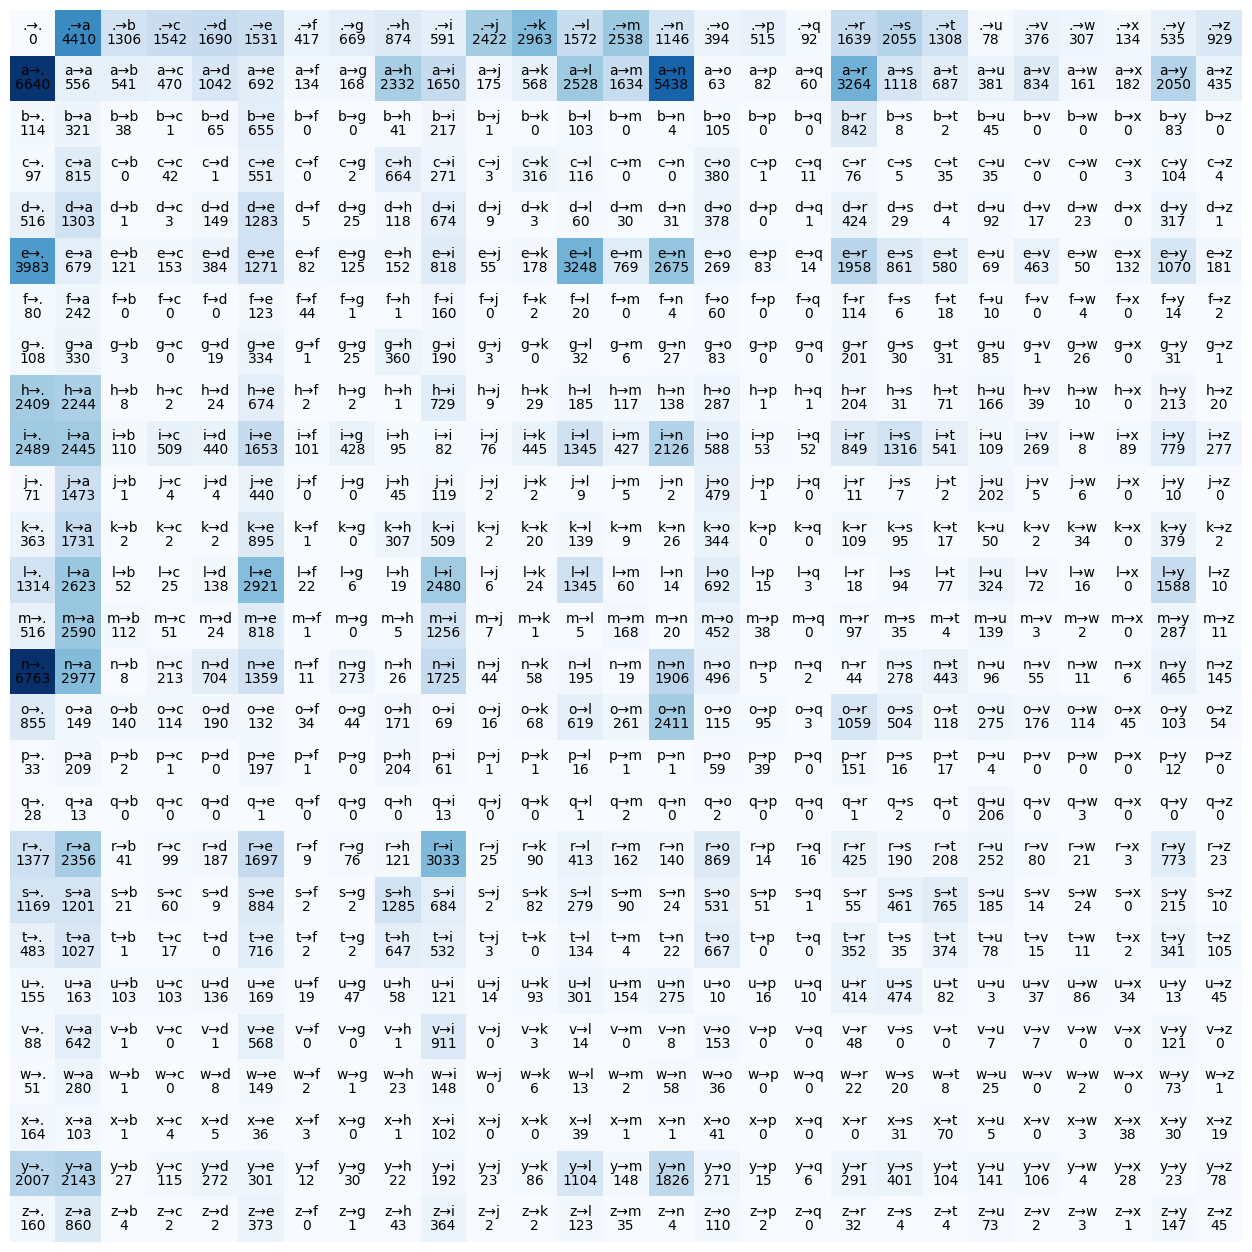

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(len(itos)):
    for j in range(len(itos)):
        chstr = itos[i] + '→' + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='black')
        plt.text(j, i, int(N[i,j]), ha='center', va='top', color='black')
plt.axis('off');

In [13]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [14]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [15]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(p, num_samples=1, replacement=True, generator=g)
# itos[ix]

tensor([13])

In [16]:
P = (N+1).float()
P = P / P.sum(1, keepdim=True)

In [17]:
g = torch.Generator().manual_seed(2147483647)


In [18]:

for i in range(5):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [19]:
log_likelihood = 0.0
n = 0

for w in words:
# for w in ['andrejq']:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        # print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')
print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-559951.5625)
nll=tensor(559951.5625)
2.4543561935424805


In [20]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [21]:
xs

tensor([ 0,  5, 13, 13,  1])

In [22]:
ys

tensor([ 5, 13, 13,  1,  0])

In [23]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
xenc.shape

torch.Size([5, 27])

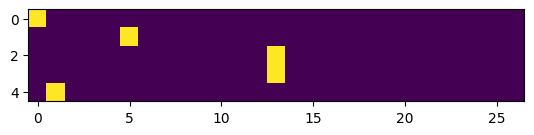

In [25]:
plt.imshow(xenc)

In [26]:
xenc.dtype

torch.float32

In [27]:
W = torch.randn((27, 27))
xenc @ W

tensor([[-0.5743,  0.7548, -0.1239,  1.0712,  0.5291, -0.1305,  0.6160, -0.6589,
          0.1593,  2.3895, -1.4743, -0.4293,  1.1418,  0.9149,  0.3636,  0.5030,
          1.9825,  1.8197,  1.1378, -2.3199, -0.2910, -0.2970, -0.3531,  1.2965,
          0.5406,  0.0918, -2.0332],
        [ 0.1371, -0.5484, -1.1846,  0.1527,  1.1575, -0.1991, -0.3716,  0.9286,
         -0.0392,  0.7188, -1.1944,  0.2667, -0.2835,  2.0726, -0.9627, -1.9954,
         -1.3386, -0.5177,  0.5968,  0.9832, -0.1421, -1.8140,  1.2459, -0.6623,
         -0.7530, -2.1822,  0.8439],
        [ 1.5439,  2.2126,  0.3738, -1.0487, -0.9365,  0.2994, -0.7370,  0.5335,
         -0.2532,  0.7089,  0.1719, -0.9467, -0.4575,  0.8967, -0.8724, -1.9958,
         -0.9138,  1.6540, -0.7101, -2.2110, -0.7125, -0.2176, -0.7154, -1.8781,
          0.0500,  0.1371,  0.7161],
        [ 1.5439,  2.2126,  0.3738, -1.0487, -0.9365,  0.2994, -0.7370,  0.5335,
         -0.2532,  0.7089,  0.1719, -0.9467, -0.4575,  0.8967, -0.8724, -1.9958

In [28]:
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0096, 0.0363, 0.0151, 0.0498, 0.0290, 0.0150, 0.0316, 0.0088, 0.0200,
         0.1863, 0.0039, 0.0111, 0.0535, 0.0426, 0.0246, 0.0282, 0.1240, 0.1054,
         0.0533, 0.0017, 0.0128, 0.0127, 0.0120, 0.0624, 0.0293, 0.0187, 0.0022],
        [0.0306, 0.0154, 0.0081, 0.0310, 0.0848, 0.0218, 0.0184, 0.0674, 0.0256,
         0.0547, 0.0081, 0.0348, 0.0201, 0.2117, 0.0102, 0.0036, 0.0070, 0.0159,
         0.0484, 0.0712, 0.0231, 0.0043, 0.0926, 0.0137, 0.0125, 0.0030, 0.0620],
        [0.1171, 0.2286, 0.0363, 0.0088, 0.0098, 0.0337, 0.0120, 0.0426, 0.0194,
         0.0508, 0.0297, 0.0097, 0.0158, 0.0613, 0.0105, 0.0034, 0.0100, 0.1307,
         0.0123, 0.0027, 0.0123, 0.0201, 0.0122, 0.0038, 0.0263, 0.0287, 0.0512],
        [0.1171, 0.2286, 0.0363, 0.0088, 0.0098, 0.0337, 0.0120, 0.0426, 0.0194,
         0.0508, 0.0297, 0.0097, 0.0158, 0.0613, 0.0105, 0.0034, 0.0100, 0.1307,
         0.0123, 0.0027, 0.0123, 0.0201, 0.0122, 0.0038, 0.0263, 0.0287, 0.0512],
        [0.0424, 0.0175,

In [29]:
probs.shape

torch.Size([5, 27])

In [30]:
probs[0].sum()

tensor(1.)

In [31]:
# SUMMARY

In [32]:
xs

tensor([ 0,  5, 13, 13,  1])

In [33]:
ys

tensor([ 5, 13, 13,  1,  0])

In [34]:
# randomly initialize 27 neurons' weights. Each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [35]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [36]:
probs.shape

torch.Size([5, 27])

In [37]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('----------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('Input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i,y]
  print('probability assigned by the net to the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

  print('==========')
  print('average negative log likelihood, i.e. loss =', nlls.mean().item())

----------
bigram example 1: .e (indexes 0,5)
Input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
----------
bigram example 2: em (indexes 5,13)
Input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the correct character: 0.0